### Here is the description of all the variables :

1. Variable: Definition
2. ID: Unique client ID
3. age: Age of the client
4. job: Type of job
5. marital: Marital status of the client
6. education: Education level
7. default: Credit in default.
8. housing: Housing loan
9. loan: Personal loan
10. contact: Type of communication
11. month: Contact month
12. day_of_week: Day of week of contact
13. duration: Contact duration
14. campaign: number of contacts performed during this campaign to the client
15. pdays: number of days that passed by after the client was last contacted
16. previous: number of contacts performed before this campaign
17. poutcome: outcome of the previous marketing campaign

**Output variable (desired target):**
* suscribed: has the client subscribed a term deposit? (binary: "yes", "no")

**Problem Statement:**
*  The business problem is a binary classification problem. The classification goal is to predict if the client contacted through the marketing campaign will subscribe a term deposit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import mode

In [3]:
train = pd.read_csv('termdeposit_train.csv')
test = pd.read_csv('termdeposit_test.csv')

In [4]:
print(train.shape)
print(test.shape)

(31647, 18)
(13564, 17)


In [5]:
(len(test)/len(train))*100

42.860302714317314

In [6]:
print(train.isnull().sum().sum())
print(train.isnull().sum().sum())

0
0


In [7]:
train.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [8]:
test.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [11]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in train.columns.to_list() if x not in categorical]
numerical.remove('subscribed')

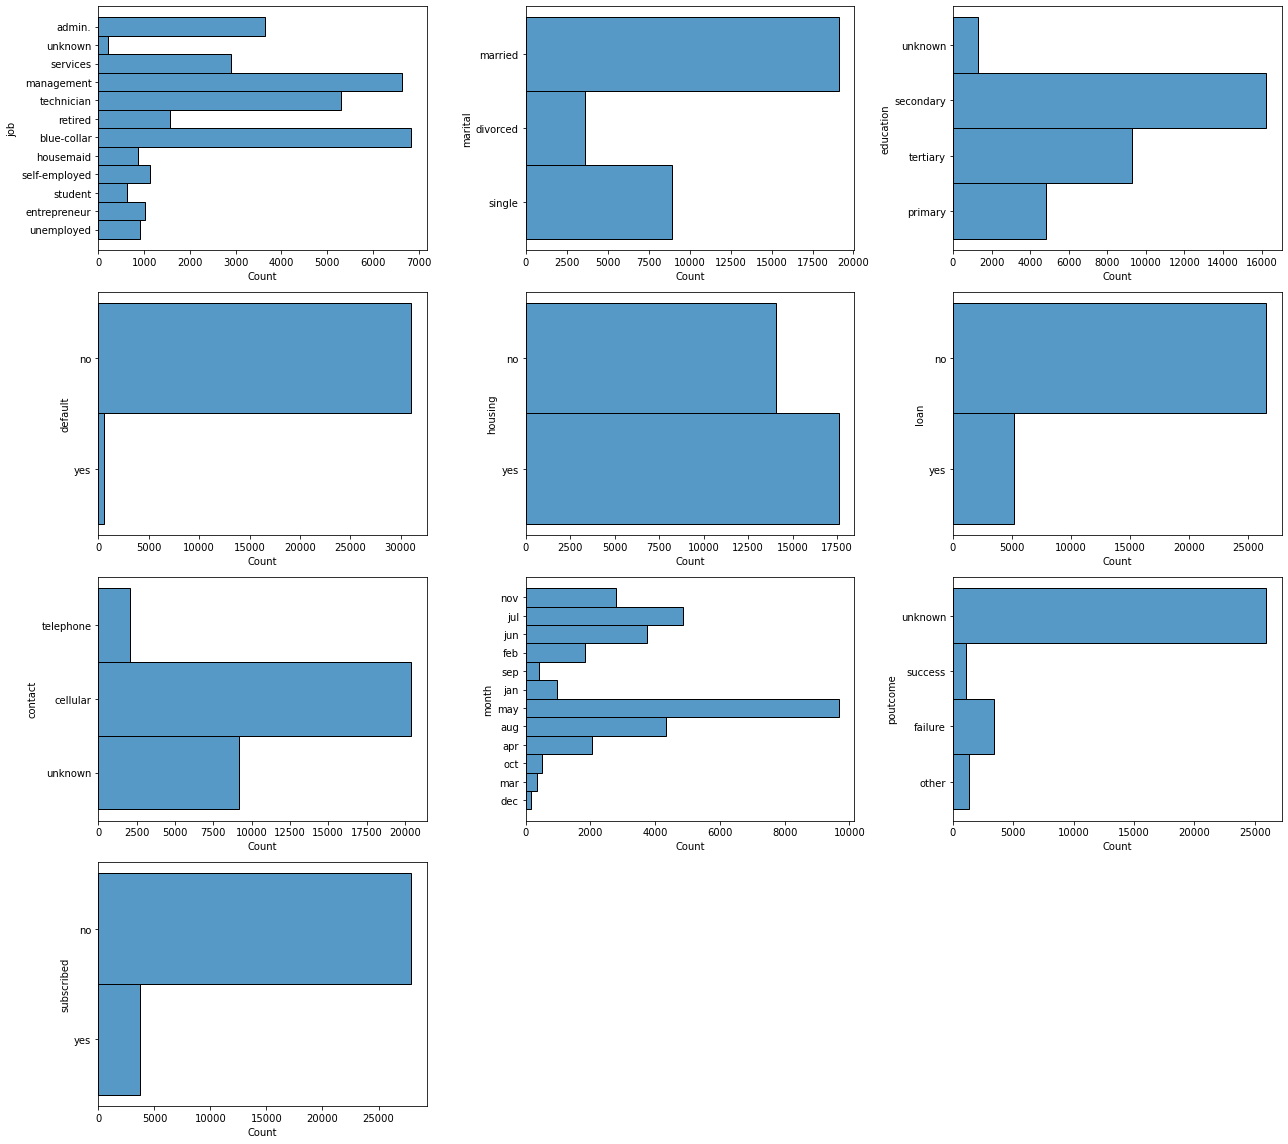

In [12]:
cols = 3                                                         #we can see the frequency ditribution here
rows = 4
num_cols = train.select_dtypes(include='object').columns
fig = plt.figure( figsize=(cols*6, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(y = train[col], ax = ax)
    
fig.tight_layout()  
plt.show()

#### bank client attributes:
* **age:** age of client (numeric)
* **job :** type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
* **marital :** marital status (categorical: "married", "divorced", "single")
* **education:** client highest education (categorical: "unknown", "secondary", "primary", "tertiary")
* **default:** has credit in default? (binary/2-categories: "yes", "no")
* **balance:** average yearly balance, in euros (numeric)
* **housing:** has housing loan? (binary/2-categories: "yes", "no")
* **loan:** has personal loan? (binary/2-categories: "yes", "no")

#### related with the last contact of the current campaign:
* **contact**: contact communication type (categorical: "unknown", "telephone", "cellular")
* **day:** last contact day of the month (numeric)
* **month:** last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* **duration:** last contact duration, in seconds (numeric)

#### other attributes:
* **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* **previous:** number of contacts performed before this campaign and for this client (numeric)
* **poutcome:** outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")

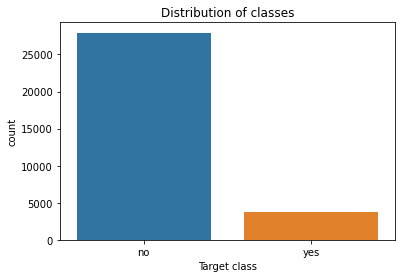

In [13]:
sns.countplot(x=train['subscribed'])
plt.title('Distribution of classes')
plt.xlabel('Target class')
plt.show()

#### Dataset is Higly imbalanced 

### Age

In [14]:
train.age.describe()

count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

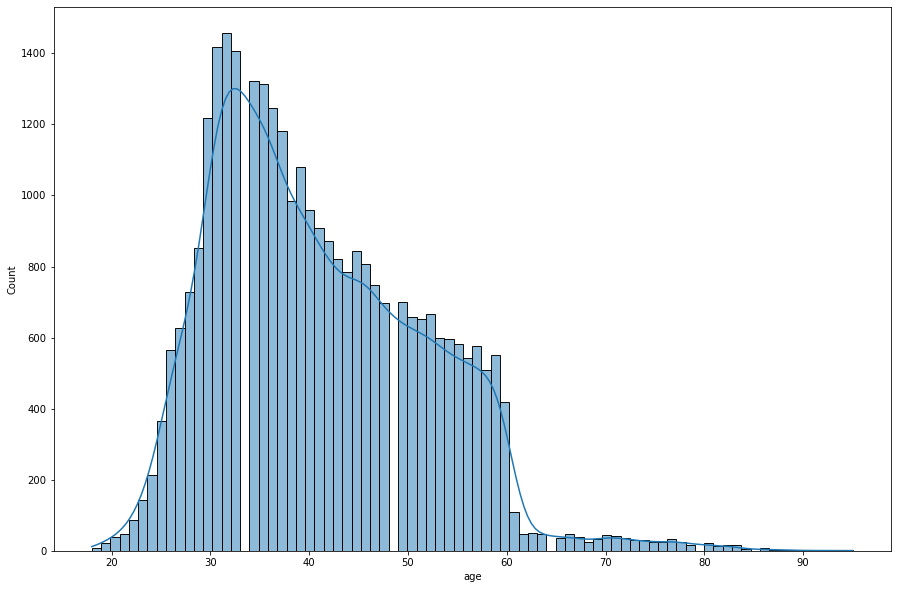

In [15]:
 plt.figure( figsize=(15,10))
sns.histplot(x = train['age'], kde = True)
plt.show()

In [16]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, train.age.quantile(x/100)))
iqr = train.age.quantile(0.75) - train.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


#### Pdays 

* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

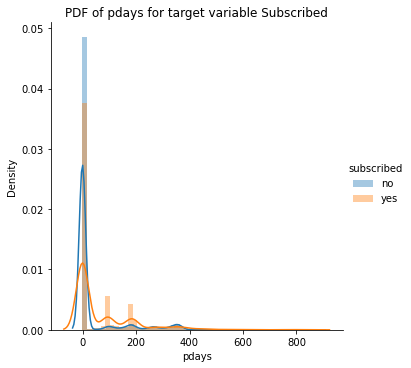

In [17]:
sns.FacetGrid(train, hue='subscribed', size=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable Subscribed')
plt.show()

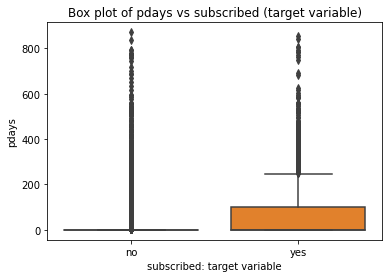

In [18]:
sns.boxplot(y=train['pdays'], x=train['subscribed'])
plt.title('Box plot of pdays vs subscribed (target variable)')
plt.xlabel('subscribed: target variable')
plt.show()

In [19]:
train['pdays'].describe()

count    31647.000000
mean        39.576042
std         99.317592
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [20]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, train.pdays.quantile(x/100)))
iqr = train.pdays.quantile(0.75) - train.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than equal to 313.0
96% of pdays are less than equal to 336.0
97% of pdays are less than equal to 348.0
98% of pdays are less than equal to 358.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


### 
* The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
* 75% clients contacted through campaign are not previously contacted.
* Mean of pdays is 39.57
* There are outliers as we can see from boxplot

In [21]:
train[['duration', 'subscribed']]

,duration,subscribed
0,44,no
1,91,no
2,240,no
3,867,yes
4,380,no
...,...,...
31642,116,no
31643,438,yes
31644,37,no
31645,22,no


Text(0.5, 0, 'y:target variable')

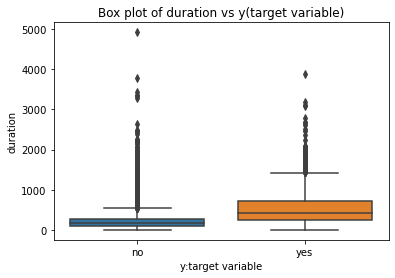

In [22]:

sns.boxplot(y=train['duration'], x=train['subscribed'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

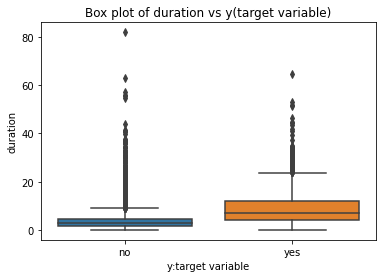

In [23]:
# converting call duration from seconds to minute
train['duration']=train['duration']/60
sns.boxplot(y=train['duration'], x=train['subscribed'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')
plt.show()

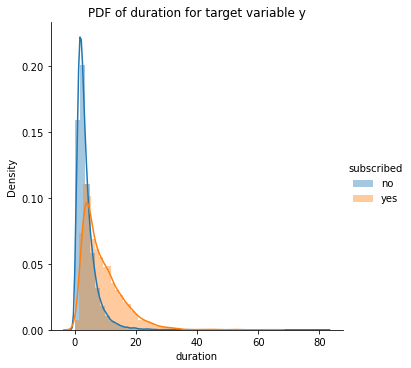

In [24]:
sns.FacetGrid(train, hue='subscribed', size=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')
plt.show()

In [25]:
train['duration'].describe()

count    31647.000000
mean         4.301892
std          4.285316
min          0.000000
25%          1.733333
50%          3.000000
75%          5.308333
max         81.966667
Name: duration, dtype: float64

In [26]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, train.duration.quantile(x/100)))
iqr = train.duration.quantile(0.75) - train.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 12.533333333333333
96% of calls have duration less than equal to 13.716666666666667
97% of calls have duration less than equal to 15.183333333333334
98% of calls have duration less than equal to 17.433333333333334
99% of calls have duration less than equal to 20.983333333333334
100% of calls have duration less than equal to 81.96666666666667
IQR 3.575


### 
* The attribute duration seems to be important feature as there is a clear distinction in quartile ranges of duration for target variable yes and no.
* 75% call duration are less than or equal to 5.30
* duration have a mean of 4.30 and standard-deviation 4.29
* There are outliers points in duration.

In [27]:
lst = [train]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [28]:
count_age_response_pct = pd.crosstab(train['subscribed'],train['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

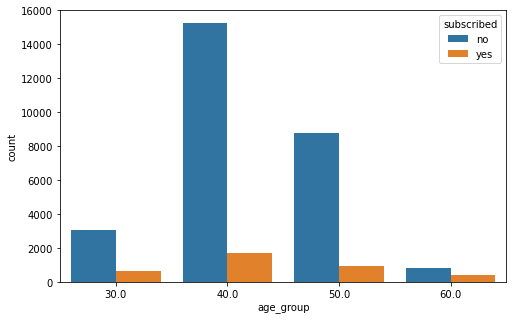

In [29]:
plt.figure(figsize= (8,5))
sns.countplot(x='age_group', data=train, hue='subscribed')
plt.show()

In [30]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(train[train['age_group'] == 30]), train[train['age_group'] == 30].subscribed.value_counts()[1]/len(train[train['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(train[train['age_group'] == 40]), train[train['age_group'] == 40].subscribed.value_counts()[1]/len(train[train['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(train[train['age_group'] == 50]), train[train['age_group'] == 50].subscribed.value_counts()[1]/len(train[train['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(train[train['age_group'] == 60]), train[train['age_group'] == 60].subscribed.value_counts()[1]/len(train[train['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 3695, Success rate: 0.17510148849797022
Clients of age 30-45 contacted: 16973, Success rate: 0.10145525245978908
Clients of age 40-60 contacted: 9734, Success rate: 0.09656872816930347
Clients of 60+ age contacted: 1245, Success rate: 0.3261044176706827


#### 
* People with age < 30 or 60+ have higher success rate.
* Only 3% of clients have age of 60+

### jobs 

In [31]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

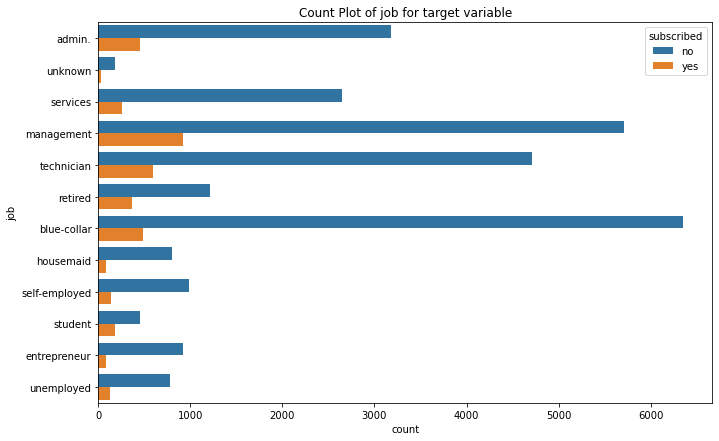

In [32]:
plt.figure(figsize = (11,7))
sns.countplot(y=train['job'], data=train, hue=train['subscribed'])
plt.title('Count Plot of job for target variable')
plt.show()

In [33]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(train[train['job'] == 'blue-collar']), train[train['job'] == 'blue-collar'].subscribed.value_counts()[1]/len(train[train['job'] == 'blue-collar'])])
table.add_row(['Management', len(train[train['job'] == 'management']), train[train['job'] == 'management'].subscribed.value_counts()[1]/len(train[train['job'] == 'management'])])
table.add_row(['Technician', len(train[train['job'] == 'technician']), train[train['job'] == 'technician'].subscribed.value_counts()[1]/len(train[train['job'] == 'technician'])])
table.add_row(['Admin', len(train[train['job']== 'admin.']), train[train['job'] == 'admin.'].subscribed.value_counts()[1]/len(train[train['job'] == 'admin.'])])
table.add_row(['Services', len(train[train['job'] == 'services']), train[train['job'] == 'services'].subscribed.value_counts()[1]/len(train[train['job'] == 'services'])])
table.add_row(['Retired', len(train[train['job'] == 'retired']), train[train['job'] == 'retired'].subscribed.value_counts()[1]/len(train[train['job'] == 'retired'])])
table.add_row(['Self-employed', len(train[train['job'] == 'self-employed']), train[train['job'] == 'self-employed'].subscribed.value_counts()[1]/len(train[train['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(train[train['job'] == 'entrepreneur']), train[train['job'] == 'entrepreneur'].subscribed.value_counts()[1]/len(train[train['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(train[train['job'] == 'unemployed']), train[train['job'] == 'unemployed'].subscribed.value_counts()[1]/len(train[train['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(train[train['job'] == 'housemaid']), train[train['job'] == 'housemaid'].subscribed.value_counts()[1]/len(train[train['job']== 'housemaid'])])
table.add_row(['Student', len(train[train['job'] == 'student']), train[train['job'] == 'student'].subscribed.value_counts()[1]/len(train[train['job'] == 'student'])])
table.add_row(['Unknown', len(train[train['job']== 'unknown']), train[train['job'] == 'unknown'].subscribed.value_counts()[1]/len(train[train['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      6842     | 0.07147033031277404 |
|   Management  |      6639     | 0.13902696189185118 |
|   Technician  |      5307     | 0.11192764273600904 |
|     Admin     |      3631     | 0.12448361332966125 |
|    Services   |      2903     | 0.08749569410954185 |
|    Retired    |      1574     | 0.22998729351969505 |
| Self-employed |      1123     |  0.1246660730186999 |
|  Entrepreneur |      1008     | 0.08432539682539683 |
|   Unemployed  |      905      |  0.1425414364640884 |
|   Housemaid   |      874      | 0.09038901601830664 |
|    Student    |      635      |  0.2866141732283465 |
|    Unknown    |      206      |  0.1262135922330097 |
+---------------+---------------+---------------------+


### 
* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
* Success rate is highest for student


### poutcome 

In [34]:
train.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

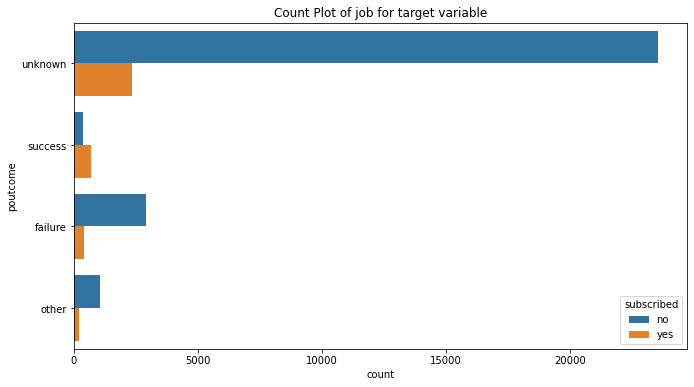

In [35]:
plt.figure(figsize = (11,6))
sns.countplot(y=train['poutcome'], data=train, hue=train['subscribed'])
plt.title('Count Plot of job for target variable')
plt.show()

### 
* Most of the clients contacted have previous outcome as 'unknown'.

### 
* 'education' 
* 'poutcome' 
* 'default' 
* 'loan' 
* 'contact'
* 'month'

### education 

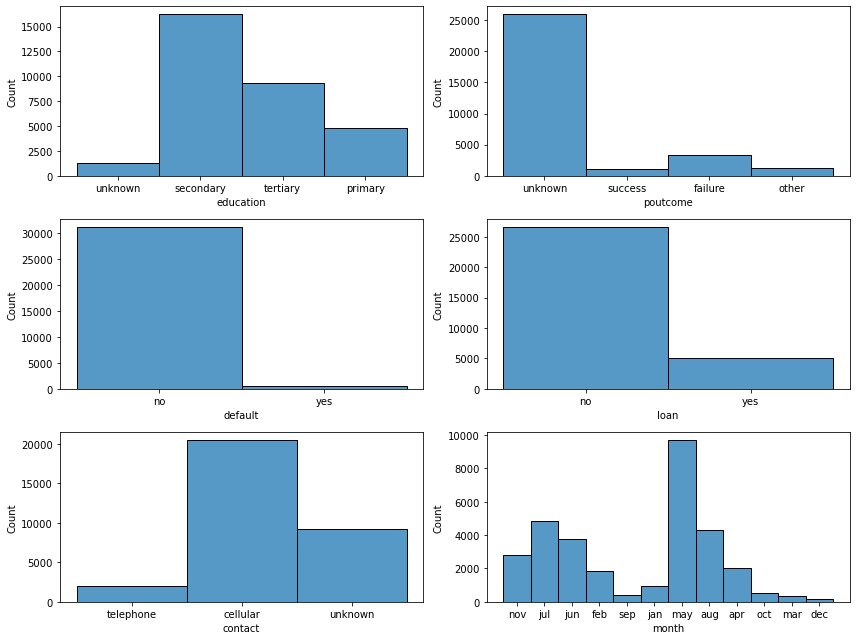

In [36]:
cols = 2                                                         #we can see the frequency ditribution here
rows = 3
num_cols = ['education','poutcome', 'default', 'loan', 'contact', 'month']
fig = plt.figure( figsize=(cols*6, rows*3))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = train[col], ax = ax)
    
fig.tight_layout()  
plt.show()

### 
1. **poutcome:** Most of the clients contacted have previous outcome as 'unknown'.
2. **education:** Most of the people who are contacted have tertiray or secondary education.
3. **default:** Very few clients are contacted who are defaulter.
4. **loan:** As seen for default variable, less client are contacted who have loan.
5. **contact:** Most of the people are contacted through cellular.


In [37]:
train[train['month'] == 'jan'].subscribed.value_counts()

no     880
yes     97
Name: subscribed, dtype: int64

In [38]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(train[train['month'] == 'jan']), train[train['month'] == 'jan'].subscribed.value_counts()[1]/len(train[train['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(train[train['month'] == 'feb']), train[train['month'] == 'feb'].subscribed.value_counts()[1]/len(train[train['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(train[train['month'] == 'mar']), train[train['month'] == 'mar'].subscribed.value_counts()[1]/len(train[train['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(train[train['month'] == 'apr']), train[train['month'] == 'apr'].subscribed.value_counts()[1]/len(train[train['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(train[train['month'] == 'may']), train[train['month'] == 'may'].subscribed.value_counts()[1]/len(train[train['month']== 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(train[train['month'] == 'jun']), train[train['month'] == 'jun'].subscribed.value_counts()[1]/len(train[train['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(train[train['month'] == 'jul']), train[train['month'] == 'jul'].subscribed.value_counts()[1]/len(train[train['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(train[train['month'] == 'aug']), train[train['month'] == 'aug'].subscribed.value_counts()[1]/len(train[train['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(train[train['month'] == 'sep']), train[train['month'] == 'sep'].subscribed.value_counts()[1]/len(train[train['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(train[train['month'] == 'oct']), train[train['month'] == 'oct'].subscribed.value_counts()[1]/len(train[train['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(train[train['month'] == 'nov']), train[train['month'] == 'nov'].subscribed.value_counts()[1]/len(train[train['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(train[train['month'] == 'dec']), train[train['month'] == 'dec'].subscribed.value_counts()[1]/len(train[train['month'] == 'dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 977, Success rate: 0.0992835209825998
Clients contacted in February: 1827, Success rate: 0.16694033935413247
Clients contacted in March: 342, Success rate: 0.49122807017543857
Clients contacted in April: 2055, Success rate: 0.18686131386861313
Clients contacted in May: 9669, Success rate: 0.0671217292377702
Clients contacted in June: 3738, Success rate: 0.10246120920278223
Clients contacted in July: 4844, Success rate: 0.09104046242774566
Clients contacted in August: 4333, Success rate: 0.12000923147934456
Clients contacted in September: 410, Success rate: 0.4658536585365854
Clients contacted in October: 512, Success rate: 0.4375
Clients contacted in November: 2783, Success rate: 0.09881422924901186
Clients contacted in December: 157, Success rate: 0.4585987261146497


## Pair Plot

In [39]:
train.drop('age_group', axis=1, inplace=True)


In [40]:
train.drop('ID', axis=1, inplace=True)

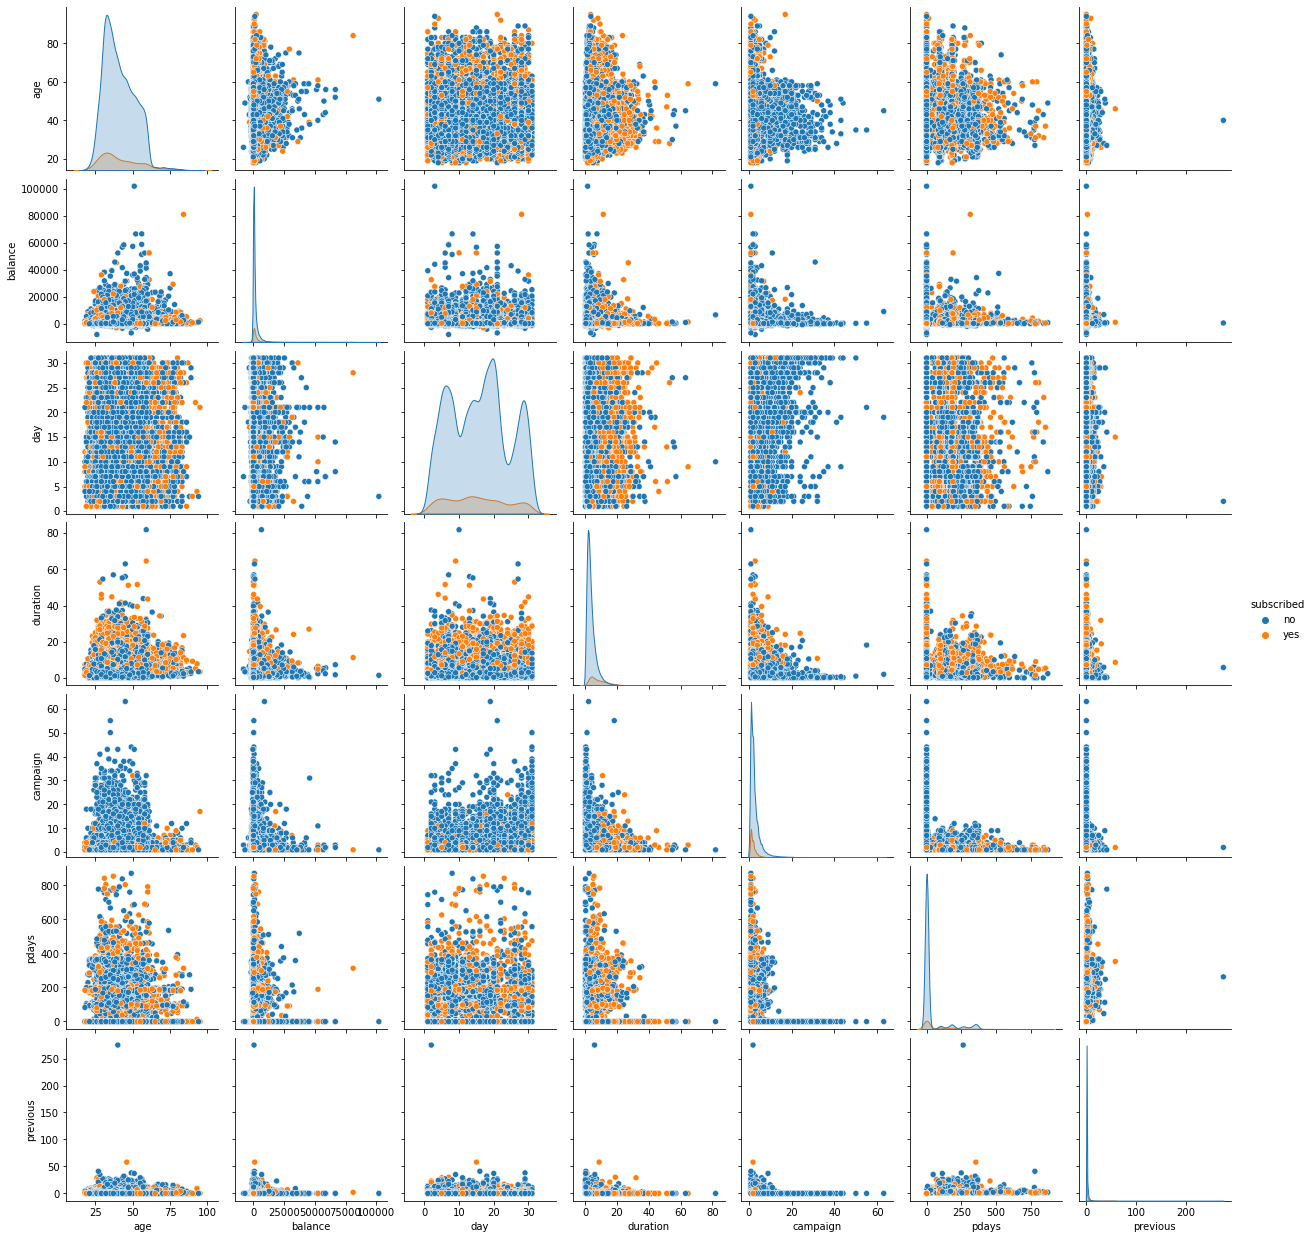

In [41]:
sns.pairplot (train, hue='subscribed')

#### 
* For most of the variables our pair plot is overlapping a lot.
* Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

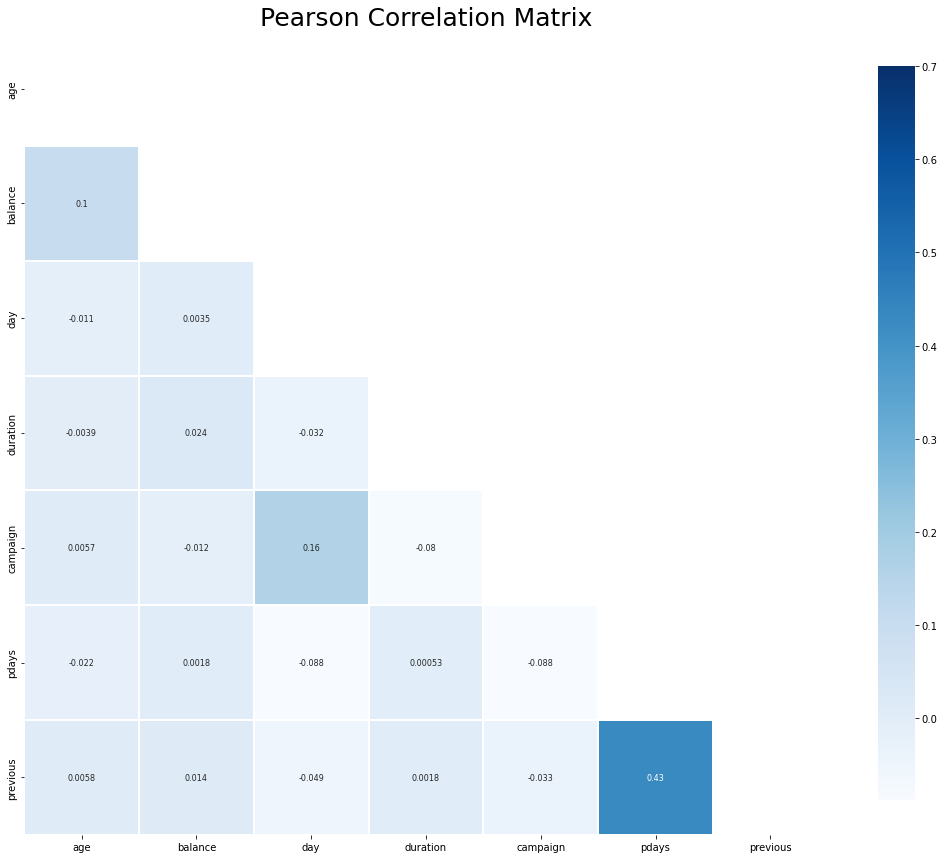

In [42]:
mask = np.zeros_like(train.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(train.corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})
plt.show()

### 
* Numerical features have very less correlation between them.
* pdays and previous have higher correlation
* duration have a higher correlation with our target variable

### Outlier detection for numerical attributes using IQR

In [43]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.733333,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.516667,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.000000,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.450000,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.333333,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.933333,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.300000,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.616667,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.366667,7,337,12,failure,no


In [44]:
numerical.remove('ID')

In [45]:
# creating new data frame of numerical columns 
data_numerical = train[numerical]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (31647, 7)


,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,0.733333,2,-1,0
1,31,3,20,1.516667,2,-1,0
2,27,891,18,4.000000,1,-1,0
3,57,3287,22,14.450000,1,84,3
4,31,119,4,6.333333,1,-1,0


In [46]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.000
balance     1358.000
day           13.000
duration       3.575
campaign       2.000
pdays          0.000
previous       0.000
dtype: float64


In [47]:
data_out = train[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(train.shape[0] - data_out.shape[0]))

11848 points are outliers based on IQR


In [130]:
train.shape

(31647, 17)

In [131]:
bank = train.copy()

In [132]:
cat_feat = bank.select_dtypes(include='O').columns


### 
d = {'yes':1, 'no':0}
train.replace({"subscribed": d}, inplace = True)

In [133]:
#!pip install imbalanced-learn

In [134]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

### Preprocessing

In [135]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.733333,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.516667,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.000000,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.450000,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.333333,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.933333,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.300000,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.616667,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.366667,7,337,12,failure,no


In [136]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [137]:
cat_feat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact',  'month', 'poutcome']

In [138]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [139]:

bank[cat_feat] = bank[cat_feat].apply(le.fit_transform)
cat_feat = bank[cat_feat]
bank.drop(columns = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact',  'month', 'poutcome'], axis = 1, inplace = True)
data = pd.concat([bank, cat_feat], axis = 1)

In [140]:
data['Subscribed'] = data['subscribed'].map({'no':0, 'yes':1})
data.drop(['subscribed'], axis = 1, inplace = True)

In [149]:
x=data.drop(['Subscribed'],axis=1)
y=data['Subscribed']

### Without using SMOT

In [152]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.493506,0.090353,0.600000,0.008947,0.016129,0.000000,0.000000,0.000000,0.5,1.000000,0.0,0.0,0.0,0.5,0.818182,1.000000
1,0.168831,0.072831,0.633333,0.018503,0.016129,0.000000,0.000000,1.000000,0.5,0.333333,0.0,0.0,0.0,0.0,0.454545,1.000000
2,0.116883,0.080893,0.566667,0.048800,0.000000,0.000000,0.000000,0.636364,0.5,0.333333,0.0,1.0,0.0,0.0,0.454545,1.000000
3,0.506494,0.102646,0.700000,0.176291,0.000000,0.097477,0.010909,0.363636,0.0,0.666667,0.0,0.0,0.0,0.0,0.545455,0.666667
4,0.168831,0.073884,0.100000,0.077267,0.000000,0.000000,0.000000,0.818182,0.5,0.333333,0.0,1.0,0.0,0.0,0.272727,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.142857,0.072803,0.366667,0.023587,0.016129,0.000000,0.000000,0.363636,1.0,0.666667,0.0,1.0,0.0,0.0,0.727273,1.000000
31643,0.454545,0.076253,0.133333,0.089061,0.016129,0.000000,0.000000,0.363636,0.0,0.666667,0.0,0.0,1.0,0.0,0.545455,1.000000
31644,0.181818,0.075636,0.200000,0.007523,0.032258,0.000000,0.000000,0.363636,1.0,0.666667,0.0,0.0,0.0,0.0,0.090909,1.000000
31645,0.506494,0.074846,0.466667,0.004473,0.096774,0.387615,0.043636,0.818182,0.5,0.333333,0.0,1.0,0.0,0.5,0.727273,0.000000


In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 89.31016324381254
Accuracy Score of Logistic Regression model in test is  88.91747923438065
...........

Accuracy Score of Decision Tree Classifier model in test is 86.76145339652449
Accuracy Score of Decision Tree Classifier model in train is 100.0
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 88.93101632438125
Accuracy Score of K-Nearest Neighbour Classifier model in train is 90.90375586854461
.............

Accuracy Score of Gradient Boosting Classifier model in test is 90.56345444971038
Accuracy Score of Gradient Boosting Classifier model in train is 90.93535572408811
.............

Accuracy Score of Random Forest model in test is 90.78462348604529
Accuracy Score of Random Forest model in train is 99.99548573492235
.............

Accuracy Score of MultinomialNB model in test is 88.44655081621906
Accuracy Score of MultinomialNB model in train is 88.18165402672446
.............

Accuracy Score o

In [183]:
print("Accuracy Score of Gradient Boosting Classifier model is", accuracy_score(y_test, pred_gbc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_gbc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_gbc))

Accuracy Score of Gradient Boosting Classifier model is 90.56345444971038
Confusion matrix for RFC Model is
[[8159  239]
 [ 657  440]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8398
           1       0.65      0.40      0.50      1097

    accuracy                           0.91      9495
   macro avg       0.79      0.69      0.72      9495
weighted avg       0.89      0.91      0.90      9495



### Let's see cross validation in Gradient Boosting Classifier

In [184]:
scores = cross_val_score(gbc, x, y, cv=5)

In [185]:
scores

array([0.9056872 , 0.90410742, 0.90188023, 0.90267025, 0.90219624])

In [186]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.0014


In [191]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.733333,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.516667,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.000000,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.450000,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.333333,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.933333,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.300000,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.616667,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.366667,7,337,12,failure,no


### Removing Outliers and apply smote technique

In [212]:
data_2 = data.copy()

In [207]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

BoxPlots of the features:


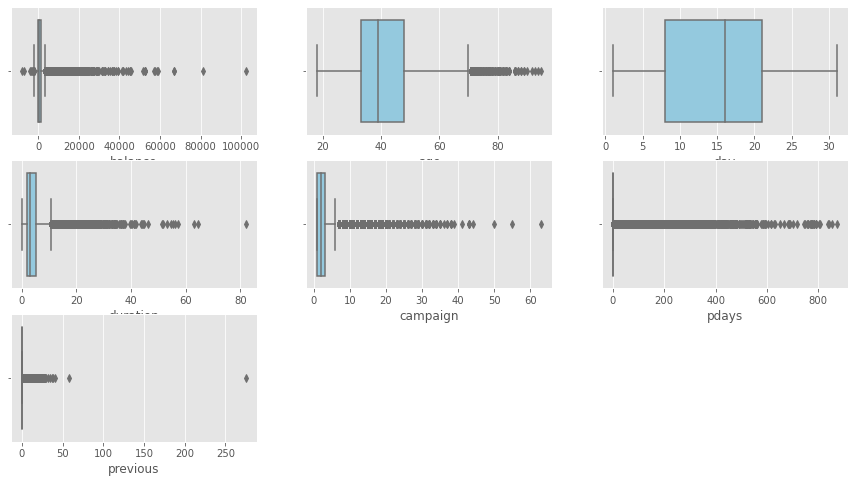

In [214]:
plt.style.use('ggplot')
clist = ['balance','age','day','duration','campaign', 'pdays',
       'previous']
plt.figure(figsize = (15,8))
for i in range(0, len(clist)):
    plt.subplot(3,3, i+1)
    sns.boxplot(data_2[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [216]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_2[clist]))
print(z)

        balance       age       day  duration  campaign     pdays  previous
0      0.187933  1.415793  0.379579  0.832754  0.245906  0.408555  0.237059
1      0.449397  0.937156  0.499526  0.649957  0.245906  0.408555  0.237059
2      0.156159  1.313627  0.259631  0.070449  0.567059  0.408555  0.237059
3      0.635055  1.509911  0.739422  2.368149  0.567059  0.447299  1.001336
4      0.411091  0.937156  1.419637  0.474054  0.567059  0.408555  0.237059
...         ...       ...       ...       ...       ...       ...       ...
31642  0.450388  1.125392  0.460055  0.552724  0.245906  0.408555  0.237059
31643  0.324903  1.133439  1.299690  0.699635  0.245906  0.408555  0.237059
31644  0.347358  0.843038  1.059794  0.859979  0.075247  0.408555  0.237059
31645  0.376088  1.509911  0.100212  0.918319  1.359859  2.994723  4.716521
31646  0.383022  1.321675  0.580003  6.669728  0.245906  0.408555  0.237059

[31647 rows x 7 columns]


In [217]:
threshold = 3
np.where(z > 3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([4, 0, 5, ..., 5, 6, 3], dtype=int64))

In [218]:
data_2 = data_2[(z < 3).all(axis=1)]
print(data_2.shape)

(28124, 17)


BoxPlots of the features:


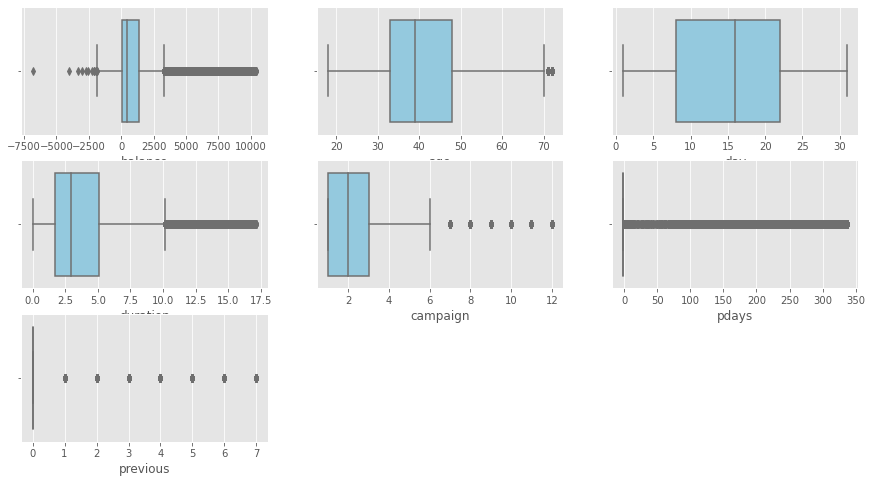

In [219]:
plt.style.use('ggplot')
clist = ['balance','age','day','duration','campaign', 'pdays',
       'previous']
plt.figure(figsize = (15,8))
for i in range(0, len(clist)):
    plt.subplot(3,3, i+1)
    sns.boxplot(data_2[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [222]:
x=data_2.drop(['Subscribed'],axis=1)
y=data_2['Subscribed']

In [223]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.703704,0.507808,0.600000,0.042760,0.090909,0.000000,0.000000,0.000000,0.5,1.000000,0.0,0.0,0.0,0.5,0.818182,1.000000
1,0.240741,0.396183,0.633333,0.088435,0.090909,0.000000,0.000000,1.000000,0.5,0.333333,0.0,0.0,0.0,0.0,0.454545,1.000000
2,0.166667,0.447542,0.566667,0.233236,0.000000,0.000000,0.000000,0.636364,0.5,0.333333,0.0,1.0,0.0,0.0,0.454545,1.000000
3,0.722222,0.586119,0.700000,0.842566,0.000000,0.251479,0.428571,0.363636,0.0,0.666667,0.0,0.0,0.0,0.0,0.545455,0.666667
4,0.240741,0.402892,0.100000,0.369291,0.000000,0.000000,0.000000,0.818182,0.5,0.333333,0.0,1.0,0.0,0.0,0.272727,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0.462963,0.567669,0.633333,0.029155,0.272727,0.000000,0.000000,0.363636,1.0,0.333333,0.0,0.0,0.0,1.0,0.545455,1.000000
28120,0.351852,0.471718,0.166667,0.429543,0.090909,0.000000,0.000000,0.818182,1.0,0.666667,0.0,0.0,0.0,1.0,0.545455,1.000000
28121,0.203704,0.396009,0.366667,0.112731,0.090909,0.000000,0.000000,0.363636,1.0,0.666667,0.0,1.0,0.0,0.0,0.727273,1.000000
28122,0.648148,0.417987,0.133333,0.425656,0.090909,0.000000,0.000000,0.363636,0.0,0.666667,0.0,0.0,1.0,0.0,0.545455,1.000000


In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 90.63759184640911
Accuracy Score of Logistic Regression model in test is  90.272274712994
...........

Accuracy Score of Decision Tree Classifier model in test is 88.05404124200047
Accuracy Score of Decision Tree Classifier model in train is 100.0
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 90.6494429959706
Accuracy Score of K-Nearest Neighbour Classifier model in train is 92.45656811947576
.............

Accuracy Score of Gradient Boosting Classifier model in test is 91.30125622185352
Accuracy Score of Gradient Boosting Classifier model in train is 92.050187950828
.............

Accuracy Score of Random Forest model in test is 91.49087461483764
Accuracy Score of Random Forest model in train is 99.99492024789191
.............

Accuracy Score of MultinomialNB model in test is 90.37686655605593
Accuracy Score of MultinomialNB model in train is 89.61190693894137
.............

Accuracy Score of ADA

### observed improved in the accuracy score

In [225]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

In [226]:
x_new, y_new = smk.fit_resample(x,y)

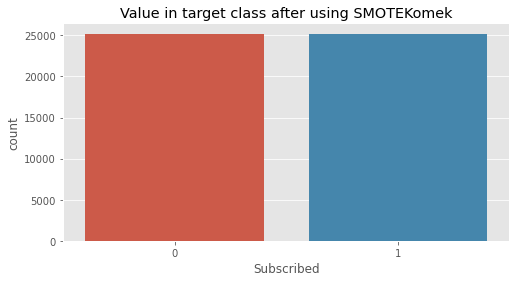

In [228]:
plt.figure(figsize = (8, 4))
plt.title('Value in target class after using SMOTEKomek')
sns.countplot(x = y_new)
plt.show()

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3)

In [230]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)


Accuracy Score of Logistic Regression model in train is 80.88595041322314
Accuracy Score of Logistic Regression model in test is  81.1641021281419
...........

Accuracy Score of Decision Tree Classifier model in test is 90.7305785123967
Accuracy Score of Decision Tree Classifier model in train is 100.0
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 91.33223140495868
Accuracy Score of K-Nearest Neighbour Classifier model in train is 93.79976763297346
.............

Accuracy Score of Gradient Boosting Classifier model in test is 91.69586776859504
Accuracy Score of Gradient Boosting Classifier model in train is 92.2922157046105
.............

Accuracy Score of Random Forest model in test is 95.10743801652892
Accuracy Score of Random Forest model in train is 100.0
.............

Accuracy Score of MultinomialNB model in test is 71.43801652892562
Accuracy Score of MultinomialNB model in train is 71.91476097367452
.............

Accuracy Score of ADA Boost mod

### Hyper Parameters Tuning of Random Forest

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
param_grid = {"n_estimators":[5,20,50], 'max_depth':range(5,16,5), 'min_samples_split':range(200,1001,500),
             'min_samples_leaf':range(30,71,20),} 
               
grid = GridSearchCV(RandomForestClassifier(), param_grid,verbose=True)
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': 15,
 'min_samples_leaf': 30,
 'min_samples_split': 200,
 'n_estimators': 50}

In [236]:
rfc_model = RandomForestClassifier(max_depth = best_param['max_depth'],
                                  min_samples_leaf = best_param['min_samples_leaf'],
                                 min_samples_split = best_param['min_samples_split'],
                                 n_estimators = best_param['n_estimators'])
rfc_model.fit(x_train,y_train)

rfc_pred =  rfc_model.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, rfc_pred)*100)

pred_rfc_train = rfc_model.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)

print(confusion_matrix(y_test, rfc_pred))

Accuracy Score of Random Forest model in test is 88.91239669421488
Accuracy Score of Random Forest model in train is 89.730510924084
[[6469 1116]
 [ 561 6979]]


### Hyper Parameters Tuning of Gradient Boosting Classifier

In [237]:
param_test = {"n_estimators":[5,20,50,100],
              'max_depth':range(5,10,15),
              "learning_rate":[0.1,1,10]}

grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_test,verbose=True);
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}

In [238]:
gbc_model = GradientBoostingClassifier(n_estimators=best_param['n_estimators'],max_depth=best_param['max_depth'],learning_rate=best_param['learning_rate'])
gbc_model.fit(x_train,y_train)

gbc_pred = gbc_model.predict(x_test)
print("Accuracy Score of  Gradient Boosting Classifier model in test is", accuracy_score(y_test, gbc_pred)*100)

pred_gbc_train = gbc_model.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
      
print(confusion_matrix(y_test,gbc_pred))

Accuracy Score of  Gradient Boosting Classifier model in test is 94.45950413223142
Accuracy Score of Gradient Boosting Classifier model in train is 99.16971294170989
[[7178  407]
 [ 431 7109]]


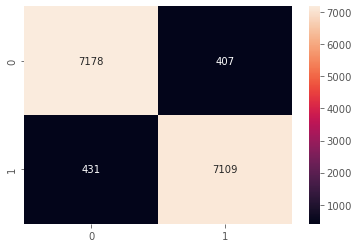

In [244]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,gbc_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [245]:
import pickle

Pkl_Filename = "gbc_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gbc_model, file)

## Gradient Boosting with Hyperparameter tuning is the best model